In [1]:
curations = {
    ('D13_4', 4.0): {
        0: [3, 4, 6, 8],
        1: [4, 5, 7, 8],
        2: [1, 3, 4, 5],
        3: [3, 4, 7],
    },
    ('D14_6', 4.0): {
        0: [1, 3],
        2: [1],
        3: [6, 7],
        4: [1, 2, 8],
    },
    ('D13_8', 4.0): {
        0: [3, 4, 5, 6],
        1: [2, 3, 4, 5, 6, 7, 8],
        2: [1, 3, 4, 6, 7, 8],
        3: [2, 3, 5, 6, 7], # exclude file 22
        4: [4, 5, 8],
        5: [7, 8],
    },
    ('D12_6', 4.0): {
        0: [2, 6, 8, 9],
        1: [1, 3],
        2: [1],
        7: [2],
    }
}

traces = {
    'D13_4': {
        3: (0.5, 2.75), 
        26: (1.5, 3.5), 
    },
    'D13_8': {
        28: (1, 7.75), 
    },
    'D14_6': {
        0: (1, 4.5), 
        56: (8.75, 7), 
        57: (7.5, 8), 
    },
}

palette = {
    'before-cocaine': '#1F77B4',
    'after-cocaine': '#DA7F8C',
}


In [2]:
import anndata as ad 
import matplotlib.pyplot as plt
import numpy as np
import os
import scanpy 
import scanpy.external as sce
import seaborn as sns 
import spikeinterface.core as sc 
import spikeinterface.extractors as se 
import pandas as pd 
from statannotations.Annotator import Annotator

sampling_frequency = 30000
n_ms_per_s = 1000
n_frames_per_ms = sampling_frequency // n_ms_per_s
ms_before = 2
spike_index = n_frames_per_ms * ms_before
n_s_per_min = 60
n_file_compared = 4
files = pd.read_csv('curation_results.csv')
file_index_before_drug = 20
file_index_after_drug = 30
n_file_per_condition = 10

figure_output_folder = 'data/processed/figures'
os.makedirs(figure_output_folder, exist_ok=True)    

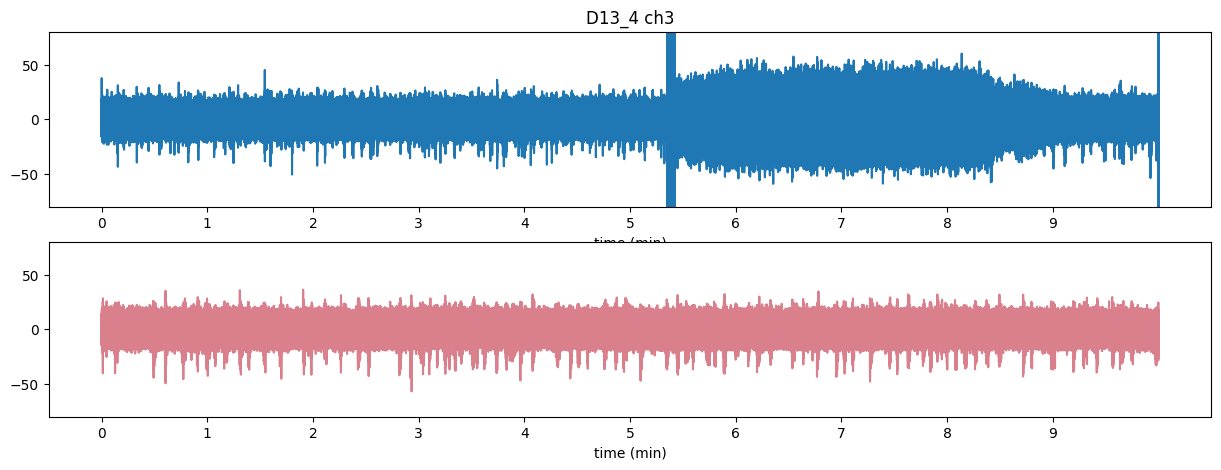

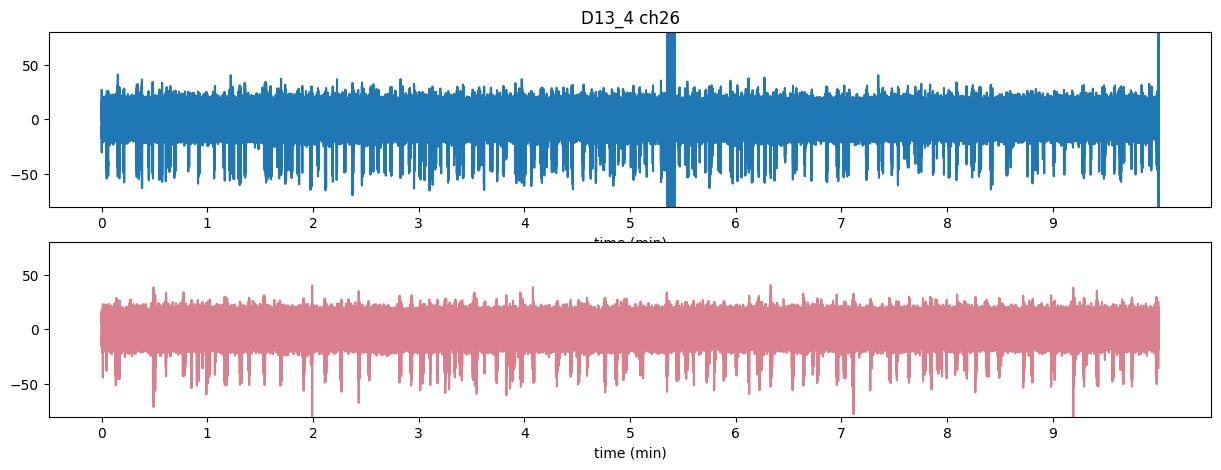

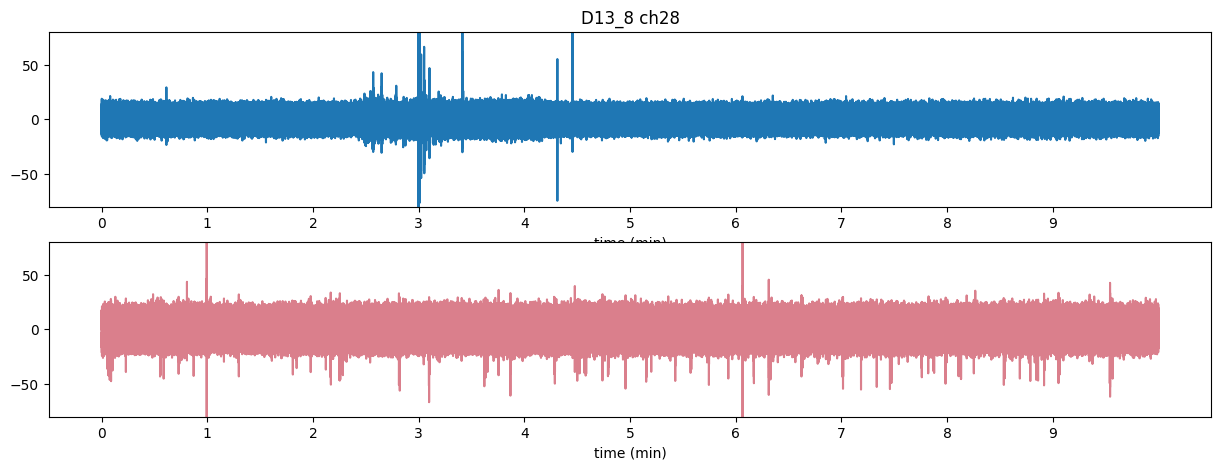

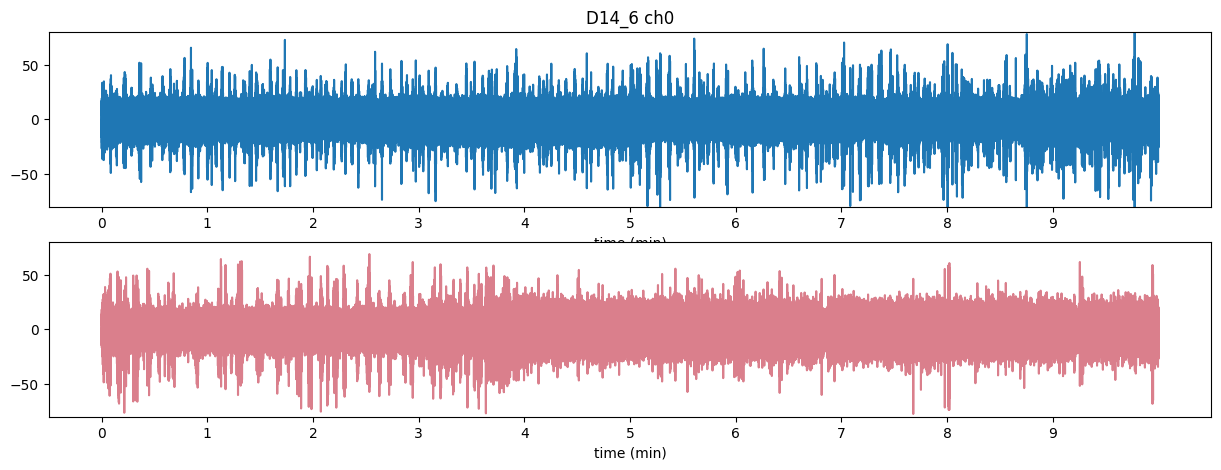

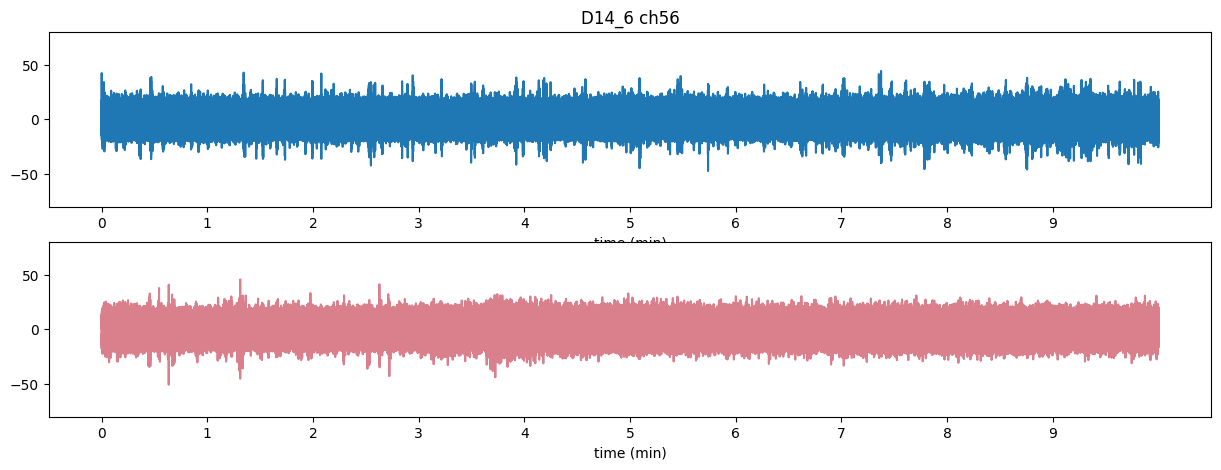

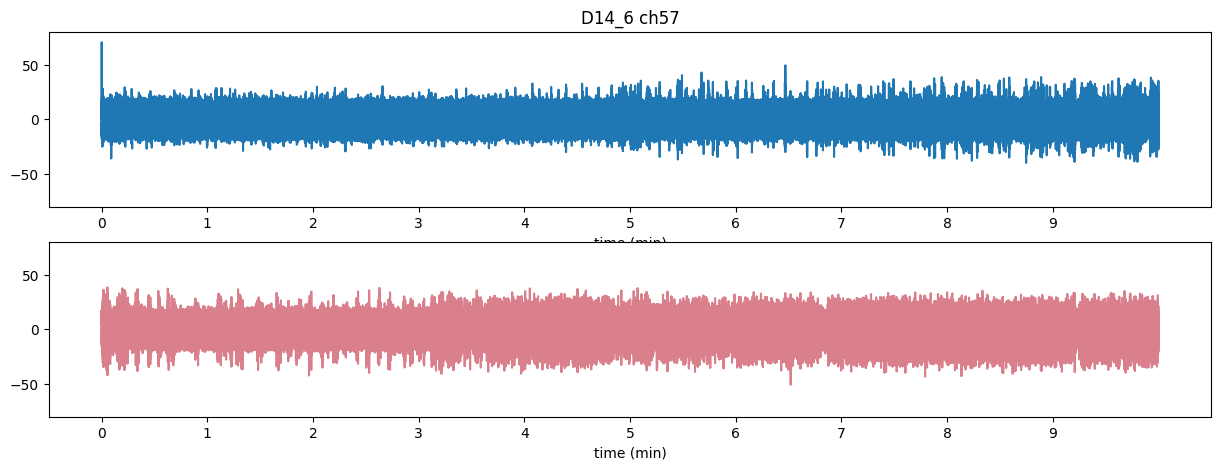

In [3]:
all_waveforms, all_extremums = [], []
for subject, subject_channels in traces.items():
        
    recordings_folder = f'data/processed/{subject}/240319/recordings'
    
    for channel_index in subject_channels:
        recordings_before_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_before_drug, file_index_before_drug+n_file_per_condition)
        ]

        recordings_after_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_after_drug, file_index_after_drug+n_file_per_condition)
        ]

        plt.figure(figsize=(15, 5))
        ax = plt.subplot(2, 1, 1)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_before_drug])[channel_index], color=palette['before-cocaine'])
        ax.set_xticks(np.arange(10) * sampling_frequency * n_s_per_min, np.arange(10))
        ax.set_xlabel('time (min)')
        ax.set_title(f'{subject} ch{channel_index}')
        ax.set_ylim(-80, 80)

        ax = plt.subplot(2, 1, 2)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_after_drug])[channel_index], color=palette['after-cocaine'])
        ax.set_xticks(np.arange(10) * sampling_frequency * n_s_per_min, np.arange(10))
        ax.set_xlabel('time (min)')
        ax.set_ylim(-80, 80)

        # plt.savefig(f'{figure_output_folder}/{subject}_{channel_index}_full.png')
        plt.show()
        plt.close()

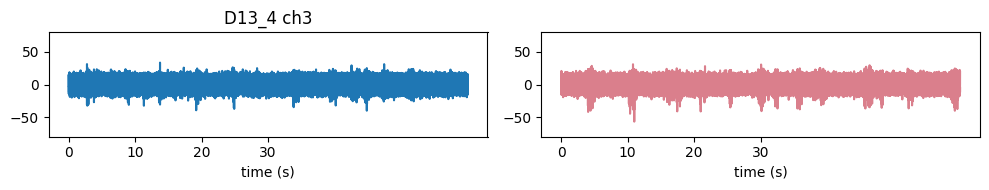

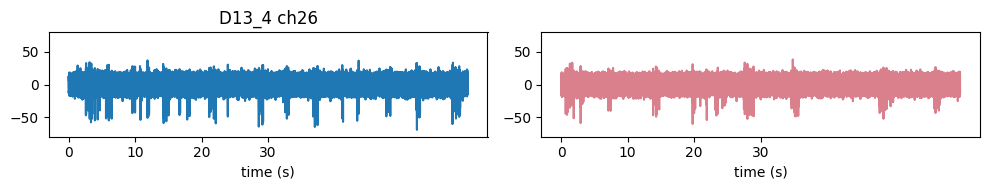

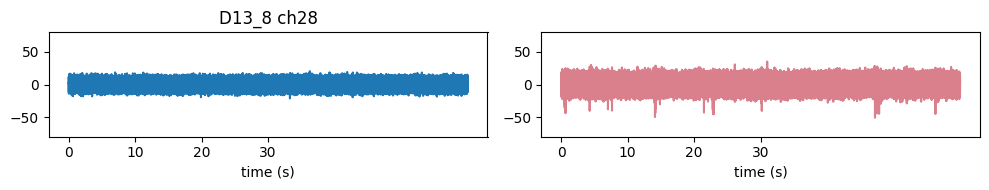

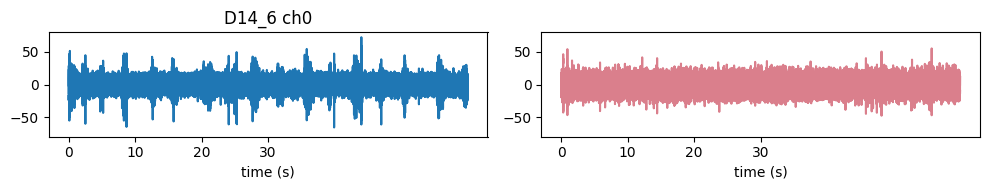

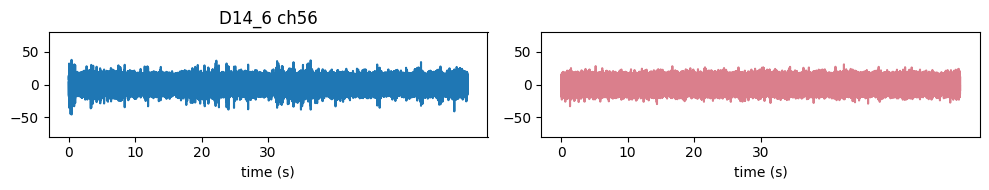

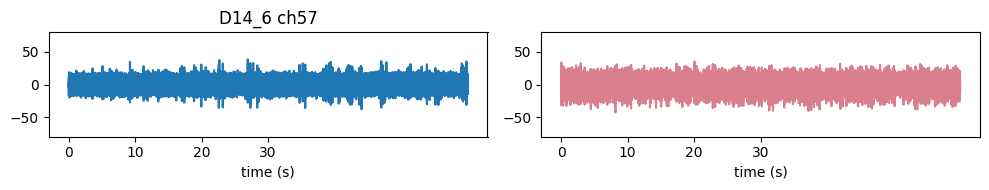

In [4]:
all_waveforms, all_extremums = [], []
plot_duration_min = 1
for subject, subject_channels in traces.items():
        
    recordings_folder = f'data/processed/{subject}/240319/recordings'
    
    for channel_index, (before_drug_t_start, after_drug_t_start) in subject_channels.items():
        recordings_before_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_before_drug, file_index_before_drug+n_file_per_condition)
        ]

        recordings_after_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_after_drug, file_index_after_drug+n_file_per_condition)
        ]

        plt.figure(figsize=(10, 2))
        ax = plt.subplot(1, 2, 1)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_before_drug])[channel_index, int(sampling_frequency * n_s_per_min * before_drug_t_start):int(sampling_frequency * n_s_per_min * (before_drug_t_start + plot_duration_min))], color=palette['before-cocaine'])
        ax.set_xticks(np.arange(4) * sampling_frequency * 10, np.arange(4) * 10)
        ax.set_xlabel('time (s)')
        ax.set_title(f'{subject} ch{channel_index}')
        ax.set_ylim(-80, 80)

        ax = plt.subplot(1, 2, 2)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_after_drug])[channel_index][int(sampling_frequency * n_s_per_min * after_drug_t_start):int(sampling_frequency * n_s_per_min * (after_drug_t_start + plot_duration_min))], color=palette['after-cocaine'])
        ax.set_xticks(np.arange(4) * sampling_frequency * 10, np.arange(4) * 10)
        ax.set_xlabel('time (s)')
        ax.set_ylim(-80, 80)

        plt.tight_layout()
        plt.savefig(f'{figure_output_folder}/{subject}_{channel_index}.pdf')
        plt.show()
        plt.close()

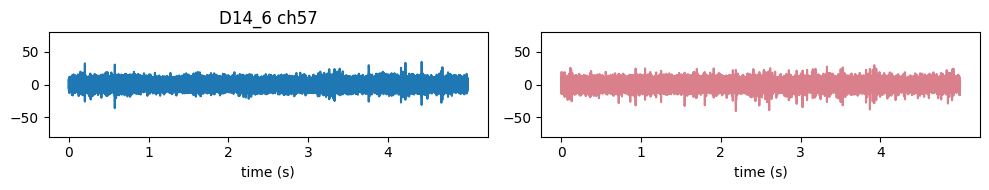

In [21]:
all_waveforms, all_extremums = [], []
plot_buffer = 35 / n_s_per_min
plot_duration_min = 5 / n_s_per_min
for subject, subject_channels in traces.items():
    if subject != 'D14_6': continue
    recordings_folder = f'data/processed/{subject}/240319/recordings'
    
    for channel_index, (before_drug_t_start, after_drug_t_start) in subject_channels.items():
        if channel_index != 57: continue
        recordings_before_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_before_drug, file_index_before_drug+n_file_per_condition)
        ]

        recordings_after_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in range(file_index_after_drug, file_index_after_drug+n_file_per_condition)
        ]

        plt.figure(figsize=(10, 2))
        ax = plt.subplot(1, 2, 1)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_before_drug])[channel_index, int(sampling_frequency * n_s_per_min * (before_drug_t_start+plot_buffer)):int(sampling_frequency * n_s_per_min * (before_drug_t_start+plot_buffer + plot_duration_min))], color=palette['before-cocaine'])
        ax.set_xticks(np.arange(5) * sampling_frequency, np.arange(5))
        ax.set_xlabel('time (s)')
        ax.set_title(f'{subject} ch{channel_index}')
        ax.set_ylim(-80, 80)

        ax = plt.subplot(1, 2, 2)
        ax.plot(np.hstack([recording.get_traces().T for recording in recordings_after_drug])[channel_index][int(sampling_frequency * n_s_per_min * (after_drug_t_start+plot_buffer)):int(sampling_frequency * n_s_per_min * (after_drug_t_start+plot_buffer + plot_duration_min))], color=palette['after-cocaine'])
        ax.set_xticks(np.arange(5) * sampling_frequency, np.arange(5))
        ax.set_xlabel('time (s)')
        ax.set_ylim(-80, 80)

        plt.tight_layout()
        plt.savefig(f'{figure_output_folder}/{subject}_{channel_index}_zoom.pdf')
        plt.show()
        plt.close()

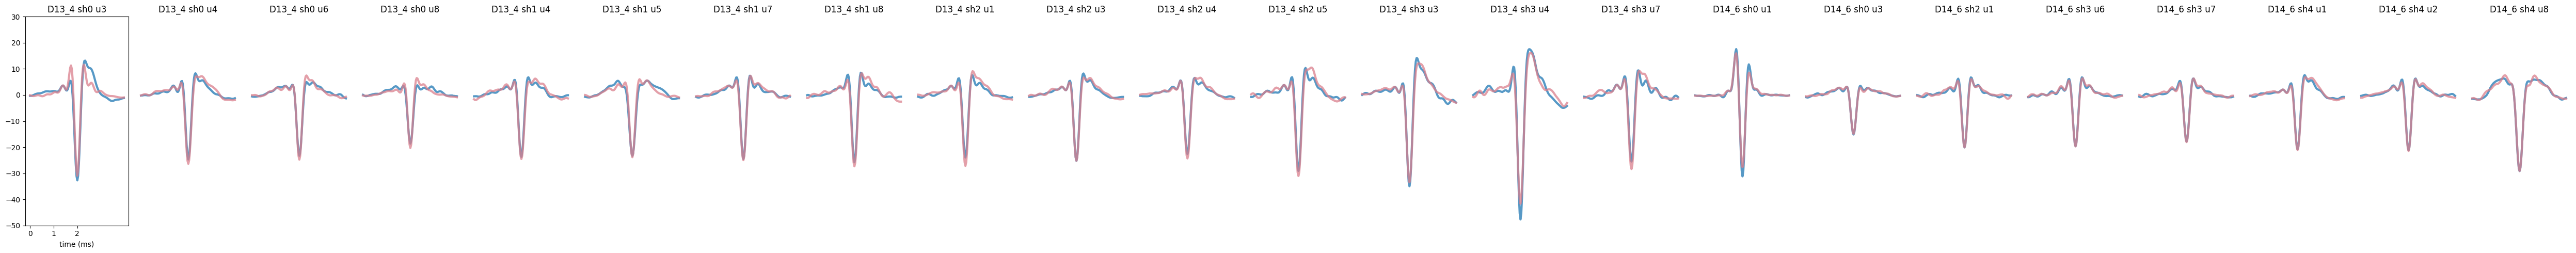

In [16]:
n_col = 23
unit_index = 1
plt.figure(figsize=(50, 5))
all_waveforms, all_extremums = [], []
for (subject, threshold), subject_curations in curations.items():
    if subject not in ['D13_4', 'D14_6']: continue
    subject_files = files[files['subject'] == subject]  
        
    recordings_folder = f'data/processed/{subject}/240319/recordings'

    for shank, shank_units in subject_curations.items():
        shank_files = subject_files[subject_files['shank'] == shank]  

        files_before_drug = [int(file_index) for file_index in shank_files[shank_files['condition'] == 'before-cocaine']['positive_file_indices'].item().split(',')][-n_file_compared:]
        files_after_drug = [int(file_index) for file_index in shank_files[shank_files['condition'] == 'after-cocaine']['positive_file_indices'].item().split(',')][-n_file_compared:]

        recordings_before_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in files_before_drug
        ]

        recordings_after_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in files_after_drug
        ]

        sortings_folder = f'data/processed/{subject}/240319/sortings-by-shanks/shank{shank}-{threshold}'
        sortings_before_drug = [
            se.NpzSortingExtractor(f'{sortings_folder}/sorter_output/file{file_index}.npz') 
                for file_index in files_before_drug
        ]
        sortings_after_drug = [
            se.NpzSortingExtractor(f'{sortings_folder}/sorter_output/file{file_index}.npz') 
                for file_index in files_after_drug
        ]

        waveforms_folder = f'data/processed/{subject}/240319/waveforms-by-shanks/shank{shank}-{threshold}'
        waveform_extractors_before_drug = [
            sc.load_waveforms(folder=f'{waveforms_folder}/file{file_index}', with_recording=True, sorting=sortings_before_drug[segment]) 
            for segment, file_index in enumerate(files_before_drug)
        ]
        waveform_extractors_after_drug = [
            sc.load_waveforms(folder=f'{waveforms_folder}/file{file_index}', with_recording=True, sorting=sortings_after_drug[segment]) 
            for segment, file_index in enumerate(files_after_drug)
        ]

        for unit_id in shank_units:
            extremum_channels_before_drug = [sc.get_template_extremum_channel(waveform_extractor, peak_sign='neg')[unit_id] for waveform_extractor in waveform_extractors_before_drug]
            extremum_channels_before_drug = [np.where(waveform_extractor.channel_ids == extremum_channel)[0].item() for extremum_channel, waveform_extractor in zip(extremum_channels_before_drug, waveform_extractors_before_drug)]
            extremum_before_drug = np.vstack([waveform_extractor.get_waveforms(unit_id)[:, :, extremum_channel] for waveform_extractor, extremum_channel in zip(waveform_extractors_before_drug, extremum_channels_before_drug)])

            extremum_channels_after_drug = [sc.get_template_extremum_channel(waveform_extractor, peak_sign='neg')[unit_id] for waveform_extractor in waveform_extractors_after_drug]
            extremum_channels_after_drug = [np.where(waveform_extractor.channel_ids == extremum_channel)[0].item() for extremum_channel, waveform_extractor in zip(extremum_channels_after_drug, waveform_extractors_after_drug)]
            extremum_after_drug = np.vstack([waveform_extractor.get_waveforms(unit_id)[:, :, extremum_channel] for waveform_extractor, extremum_channel in zip(waveform_extractors_after_drug, extremum_channels_after_drug)])

            template_before_drug = extremum_before_drug.mean(0)
            template_after_drug = extremum_after_drug.mean(0)

            ax = plt.subplot(1, n_col, unit_index)
            ax.set_title(f'{subject} sh{shank} u{unit_id}')
            ax.plot(template_before_drug, color=palette['before-cocaine'], alpha=0.75, linewidth=3)
            ax.plot(template_after_drug, color=palette['after-cocaine'], alpha=0.75, linewidth=3)
            ax.set_ylim(-50, 30)
            ax.set_xticks([0, n_frames_per_ms, n_frames_per_ms*2], [0, 1, 2])
            ax.set_xlabel('time (ms)')
            if unit_index != 1: ax.set_axis_off()
            unit_index += 1
plt.tight_layout()
plt.savefig(f'{figure_output_folder}/waveforms.pdf')
plt.show()
plt.close()

In [6]:
all_waveforms, all_extremums = [], []
for (subject, threshold), subject_curations in curations.items():
    subject_files = files[files['subject'] == subject]  
        
    recordings_folder = f'data/processed/{subject}/240319/recordings'

    for shank, shank_units in subject_curations.items():
        shank_files = subject_files[subject_files['shank'] == shank]  

        files_before_drug = [int(file_index) for file_index in shank_files[shank_files['condition'] == 'before-cocaine']['positive_file_indices'].item().split(',')][-n_file_compared:]
        files_after_drug = [int(file_index) for file_index in shank_files[shank_files['condition'] == 'after-cocaine']['positive_file_indices'].item().split(',')][-n_file_compared:]

        recordings_before_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in files_before_drug
        ]

        recordings_after_drug = [
            sc.load_extractor(f'{recordings_folder}/file{file_index}') 
                for file_index in files_after_drug
        ]

        sortings_folder = f'data/processed/{subject}/240319/sortings-by-shanks/shank{shank}-{threshold}'
        sortings_before_drug = [
            se.NpzSortingExtractor(f'{sortings_folder}/sorter_output/file{file_index}.npz') 
                for file_index in files_before_drug
        ]
        sortings_after_drug = [
            se.NpzSortingExtractor(f'{sortings_folder}/sorter_output/file{file_index}.npz') 
                for file_index in files_after_drug
        ]

        waveforms_folder = f'data/processed/{subject}/240319/waveforms-by-shanks/shank{shank}-{threshold}'
        waveform_extractors_before_drug = [
            sc.load_waveforms(folder=f'{waveforms_folder}/file{file_index}', with_recording=True, sorting=sortings_before_drug[segment]) 
            for segment, file_index in enumerate(files_before_drug)
        ]
        waveform_extractors_after_drug = [
            sc.load_waveforms(folder=f'{waveforms_folder}/file{file_index}', with_recording=True, sorting=sortings_after_drug[segment]) 
            for segment, file_index in enumerate(files_after_drug)
        ]

        for unit_id in shank_units:
            waveforms_before_drug = np.vstack([waveform_extractor.get_waveforms(unit_id) for waveform_extractor in waveform_extractors_before_drug])
            waveforms_after_drug = np.vstack([waveform_extractor.get_waveforms(unit_id) for waveform_extractor in waveform_extractors_after_drug])

            extremum_channels_before_drug = [sc.get_template_extremum_channel(waveform_extractor, peak_sign='neg')[unit_id] for waveform_extractor in waveform_extractors_before_drug]
            extremum_channels_before_drug = [np.where(waveform_extractor.channel_ids == extremum_channel)[0].item() for extremum_channel, waveform_extractor in zip(extremum_channels_before_drug, waveform_extractors_before_drug)]
            extremum_before_drug = np.vstack([waveform_extractor.get_waveforms(unit_id)[:, :, extremum_channel] for waveform_extractor, extremum_channel in zip(waveform_extractors_before_drug, extremum_channels_before_drug)])

            extremum_channels_after_drug = [sc.get_template_extremum_channel(waveform_extractor, peak_sign='neg')[unit_id] for waveform_extractor in waveform_extractors_after_drug]
            extremum_channels_after_drug = [np.where(waveform_extractor.channel_ids == extremum_channel)[0].item() for extremum_channel, waveform_extractor in zip(extremum_channels_after_drug, waveform_extractors_after_drug)]
            extremum_after_drug = np.vstack([waveform_extractor.get_waveforms(unit_id)[:, :, extremum_channel] for waveform_extractor, extremum_channel in zip(waveform_extractors_after_drug, extremum_channels_after_drug)])

            waveforms_adata = ad.AnnData(np.vstack([waveforms_before_drug, waveforms_after_drug]).reshape(len(waveforms_before_drug) + len(waveforms_after_drug), -1))
            waveforms_adata.obs['condition'] = ['before-cocaine'] * len(waveforms_before_drug) + ['after-cocaine'] * len(waveforms_after_drug)
            waveforms_adata.obs['subject'] = subject 
            waveforms_adata.obs['shank'] = shank
            waveforms_adata.obs['unit_id'] = unit_id
            waveforms_adata.obs['change'] = 'up' if len(waveforms_after_drug) > len(waveforms_before_drug) else 'down' if len(waveforms_after_drug) < len(waveforms_before_drug) else 'same'

            extremum_adata = ad.AnnData(np.vstack([extremum_before_drug, extremum_after_drug]).reshape(len(extremum_before_drug) + len(extremum_after_drug), -1))
            extremum_adata.obs['condition'] = ['before-cocaine'] * len(extremum_before_drug) + ['after-cocaine'] * len(extremum_after_drug)
            extremum_adata.obs['subject'] = subject
            extremum_adata.obs['shank'] = shank
            extremum_adata.obs['unit_id'] = unit_id
            extremum_adata.obs['change'] = 'up' if len(extremum_after_drug) > len(extremum_before_drug) else 'down' if len(extremum_after_drug) < len(extremum_before_drug) else 'same'

            template_before_drug = extremum_before_drug.mean(0)
            template_after_drug = extremum_after_drug.mean(0)
            extremum_adata.obs['firing_rate'] = [len(extremum_before_drug) / n_file_compared / n_s_per_min] * len(extremum_before_drug) + [len(extremum_after_drug) / n_file_compared / n_s_per_min] * len(extremum_after_drug)
            extremum_adata.obs['trough'] = [template_before_drug[spike_index]] * len(extremum_before_drug) + [template_after_drug[spike_index]] * len(extremum_after_drug)
            extremum_adata.obs['peak'] = [template_before_drug[spike_index:].max()] * len(extremum_before_drug) + [template_after_drug[spike_index:].max()] * len(extremum_after_drug)

            all_waveforms.append(waveforms_adata)
            all_extremums.append(extremum_adata)

            # n_row = 3
            # n_plot = 4
            # plt.figure(figsize=(15, 6))

            # scanpy.pp.neighbors(waveforms_adata)
            # scanpy.tl.pca(waveforms_adata)
            # scanpy.tl.tsne(waveforms_adata)
            # scanpy.tl.umap(waveforms_adata)

            # ax = plt.subplot(n_row, n_plot, 1)
            # scanpy.pl.pca(waveforms_adata, color='condition', title=f'{subject} shank {shank} unit {unit_id} waveforms', ax=ax, show=False, alpha=0.2, palette=palette)

            # ax = plt.subplot(n_row, n_plot, 2)
            # scanpy.pl.tsne(waveforms_adata, color='condition', title=f'{subject} shank {shank} unit {unit_id} waveforms', ax=ax, show=False, alpha=0.2, palette=palette)

            # ax = plt.subplot(n_row, n_plot, 3)
            # scanpy.pl.umap(waveforms_adata, color='condition', title=f'{subject} shank {shank} unit {unit_id} waveforms', ax=ax, show=False, alpha=0.2, palette=palette)

            # scanpy.pp.neighbors(extremum_adata)
            # scanpy.tl.pca(extremum_adata)
            # scanpy.tl.tsne(extremum_adata)
            # scanpy.tl.umap(extremum_adata)

            # ax = plt.subplot(n_row, n_plot, 5)
            # scanpy.pl.pca(extremum_adata, color='condition', title=f'{subject} shank {shank} unit {unit_id} extremum channel', ax=ax, show=False, alpha=0.2, palette=palette)

            # ax = plt.subplot(n_row, n_plot, 6)
            # scanpy.pl.tsne(extremum_adata, color='condition', title=f'{subject} shank {shank} unit {unit_id} extremum channel', ax=ax, show=False, alpha=0.2, palette=palette)

            # ax = plt.subplot(n_row, n_plot, 7)
            # scanpy.pl.umap(extremum_adata, color='condition', title=f'{subject} shank {shank} unit {unit_id} extremum channel', ax=ax, show=False, alpha=0.2, palette=palette)

            # ax = plt.subplot(1, n_plot, n_plot)
            # ax.plot(template_before_drug, color=palette['before-cocaine'])
            # ax.plot(template_after_drug, color=palette['after-cocaine'])

            # plt.tight_layout()
            # plt.savefig(f'data/processed/240428/{subject}_shank{shank}_unit{unit_id}.png')
            # plt.close()

In [7]:
waveforms_adata = ad.concat(all_waveforms, index_unique='#')
extremums_adata = ad.concat(all_extremums, index_unique='#')

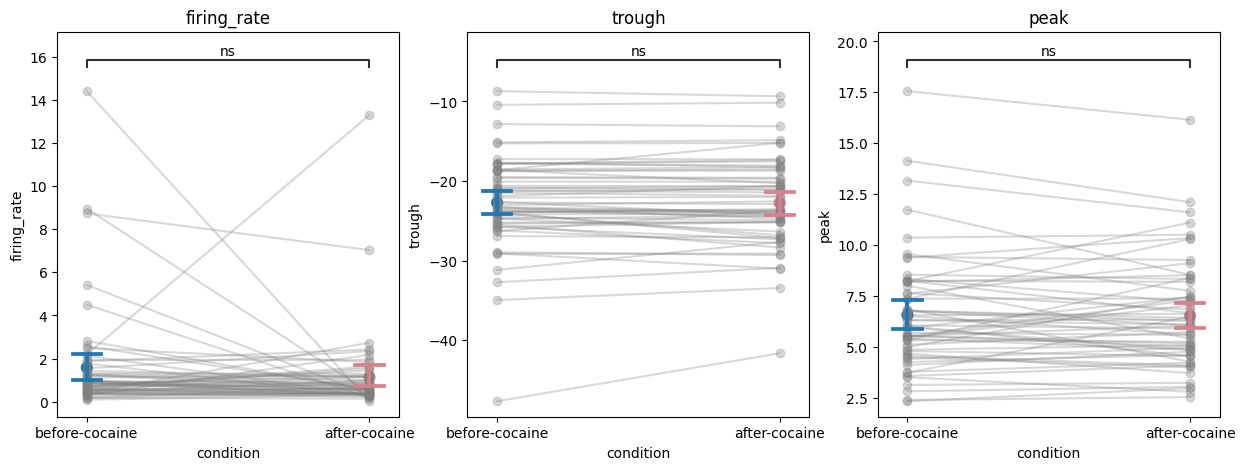

In [18]:
stats = extremums_adata.obs.drop_duplicates()

def draw_feature(feature, ax):
    def closure(grouped):
        ax.plot([0, 1], [grouped[grouped['condition'] == 'before-cocaine'][feature].item(), grouped[grouped['condition'] == 'after-cocaine'][feature].item()], marker='o', color='gray', alpha=0.3)
    return closure

features = ['firing_rate', 'trough', 'peak']
plt.figure(figsize=(15, 5))
for feature_index, feature in (enumerate(features)):
    ax = plt.subplot(1, len(features), feature_index+1, zorder=1)
    stats.groupby(['subject', 'shank', 'unit_id', 'change']).apply(draw_feature(feature, ax))
    ax.set_title(feature)
    sns.pointplot(data=stats, x='condition', y=feature, order=['before-cocaine', 'after-cocaine'], ax=ax, capsize=0.1, palette=palette, zorder=10)
    annotator = Annotator(ax, [('before-cocaine', 'after-cocaine')], verbose=False, data=stats, x='condition', y=feature, order=['before-cocaine', 'after-cocaine'])
    annotator.configure(test="t-test_welch").apply_and_annotate()
plt.savefig(f'{figure_output_folder}/stats.pdf')
plt.show()
plt.close()

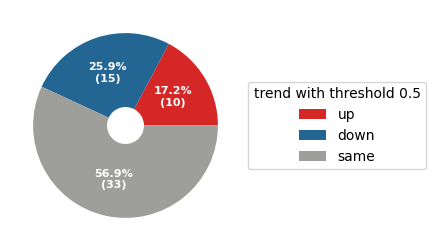

In [58]:
stats = extremums_adata.obs.drop_duplicates()
unit_counts = {
    'up': 0,
    'down': 0,
    'same': 0,
}
no_change_threshold = 0.5
def count_unit(grouped):
    difference = abs(grouped[grouped['condition'] == 'after-cocaine']['firing_rate'].item() - grouped[grouped['condition'] == 'before-cocaine']['firing_rate'].item())
    if difference <= no_change_threshold:
        unit_counts['same'] += 1
    elif grouped[grouped['condition'] == 'after-cocaine']['firing_rate'].item() > grouped[grouped['condition'] == 'before-cocaine']['firing_rate'].item():
        unit_counts['up'] += 1
    else:
        unit_counts['down'] += 1
stats.groupby(['subject', 'shank', 'unit_id', 'change']).apply(count_unit)


fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

counts = list(unit_counts.values())
trends = unit_counts.keys()


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges, texts, autotexts = ax.pie(counts, autopct=lambda pct: func(pct, counts),
                                  wedgeprops=dict(width=0.8), textprops=dict(color="w"), colors=['#d62727', '#246693', '#9e9e9a'])

ax.legend(wedges, trends,
          title=f'trend with threshold {no_change_threshold}',
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")
plt.savefig(f'{figure_output_folder}/pie.pdf')
plt.show()

In [9]:
scanpy.pp.neighbors(waveforms_adata)
scanpy.tl.pca(waveforms_adata)
scanpy.tl.tsne(waveforms_adata)
scanpy.tl.umap(waveforms_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [10]:
scanpy.pp.neighbors(extremums_adata)
scanpy.tl.pca(extremums_adata)
scanpy.tl.tsne(extremums_adata)
scanpy.tl.umap(extremums_adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


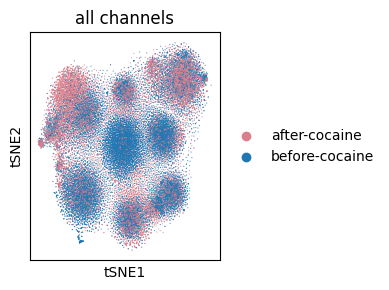

In [11]:
plt.figure(figsize=(4, 3))
ax = plt.subplot(1, 1, 1)
scanpy.pl.tsne(waveforms_adata, color='condition', ax=ax, title='all channels', show=False, alpha=0.75, s=3, palette=palette)
plt.tight_layout()
plt.savefig(f'{figure_output_folder}/tsne.png', transparent=True)
plt.show()
plt.close()

/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/xinhez/miniconda3/envs/si-0.98.2/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No d

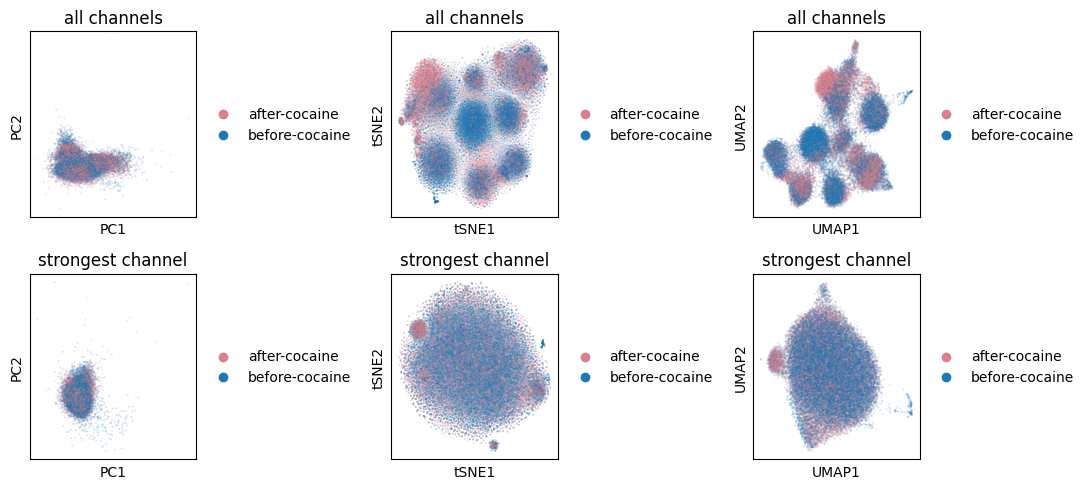

In [12]:
n_plot = 3
plt.figure(figsize=(11, 5))
ax = plt.subplot(2, n_plot, 1)
scanpy.pl.pca(waveforms_adata, color='condition', ax=ax, title='all channels', show=False, alpha=0.2, s=7.5, palette=palette)
ax = plt.subplot(2, n_plot, 2)
scanpy.pl.tsne(waveforms_adata, color='condition', ax=ax, title='all channels', show=False, alpha=0.2, s=7.5, palette=palette)
ax = plt.subplot(2, n_plot, 3)
scanpy.pl.umap(waveforms_adata, color='condition', ax=ax, title='all channels', show=False, alpha=0.2, s=7.5, palette=palette)
ax = plt.subplot(2, n_plot, 4)
scanpy.pl.pca(extremums_adata, color='condition', ax=ax, title='strongest channel', show=False, alpha=0.2, s=7.5, palette=palette)
ax = plt.subplot(2, n_plot, 5)
scanpy.pl.tsne(extremums_adata, color='condition', ax=ax, title='strongest channel', show=False, alpha=0.2, s=7.5, palette=palette)
ax = plt.subplot(2, n_plot, 6)
scanpy.pl.umap(extremums_adata, color='condition', ax=ax, title='strongest channel', show=False, alpha=0.2, s=7.5, palette=palette)
plt.tight_layout()
# plt.savefig(f'{figure_output_folder}/summary.png', transparent=True)
plt.show()
plt.close()